# Trabalho de Analise Exploratória
Aluno: Luiz Felipe Antunes Oliveira

A Análise Exploratória é uma fase importante de uma tarefa de Ciência de Dados. É nesta fase que buscamos entender os dados com os seguintes objetivos:

- Identificar padrões iniciais
- Formular perguntas de pesquisa e hipóteses
- Identificar dados incompletos ou não confiáveis

Para atingir os objetivos, em geral usa-se uma combinação de análises estatísticas com uma grande ênfase em geração e interpretação de gráficos.

## Leitura e análise inicial dos dados


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()


In [7]:
%matplotlib inline

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_2016(LIMPO2).csv',
                      sep=',', encoding='utf-8')

In [9]:
df.drop(columns=['soma_total'], inplace=True)

df.head(50)

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,Platform,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,Shooter,26.93,0.63,0.28,0.47,28.31


Vamos começar com perguntas iniciais:

Qual a média das notas de redações das pessoas que estudam em escola pública e privada? Qual a idade máxima? Quantos valores únicos possuímos para a coluna NOTA_REDACAO?

In [10]:
# Media de idade
df["VENDAS(GLOBAL)"].mean()

0.5334617455285808

In [66]:
# Idade maxima
df["IDADE"].max()

91

In [36]:
# Valores únicos para BAIRRO_ASS
len(df.groupby(["ESCOLA"]).size())

3

In [20]:
# Valores únicos para SUBDIVISAO
len(df.groupby(["NOTA_REDACAO"]).size())

50

#### Visualização da distribuição das variáveis

Existe alguma diferença na distribuição das idades entre escola pública e privada?

<AxesSubplot:>

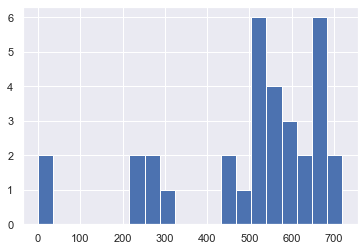

In [69]:
# Resposta para distribuição para escola pública
df_esc_pub = df[df['MUNICIPIO_RESIDENCIA'] == 'Óleo']
df_esc_pub["NOTA_REDACAO"].hist(bins=20)      

<AxesSubplot:ylabel='Density'>

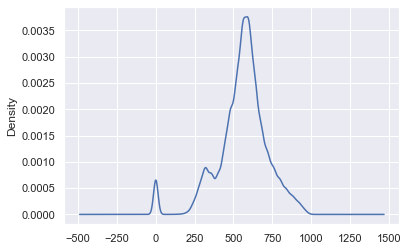

In [30]:
df_esc_pub["NOTA_REDACAO"].plot.kde()

<AxesSubplot:>

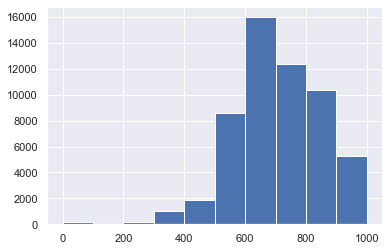

In [41]:
# Resposta para distribuição para escolas privadas
df_sex_mas = df[df['ESCOLA'] == 'privada']
df_sex_mas["NOTA_REDACAO"].hist(bins=10)

<AxesSubplot:ylabel='Density'>

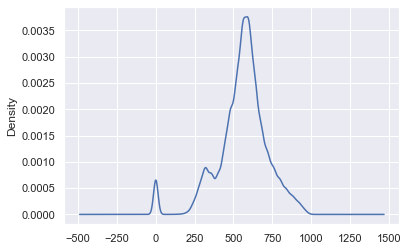

In [32]:
df_esc_pub["NOTA_REDACAO"].plot.kde()

Utilizando o seaborn para uma melhor visualização

<AxesSubplot:xlabel='NOTA_REDACAO', ylabel='Count'>

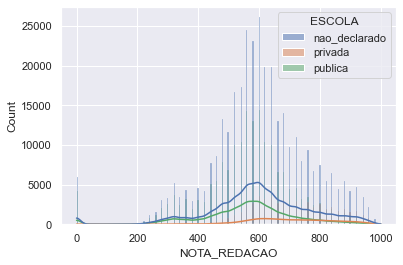

In [42]:
sns.histplot(data=df, x="NOTA_REDACAO", kde=True, hue="ESCOLA")

<AxesSubplot:xlabel='NOTA_REDACAO', ylabel='Count'>

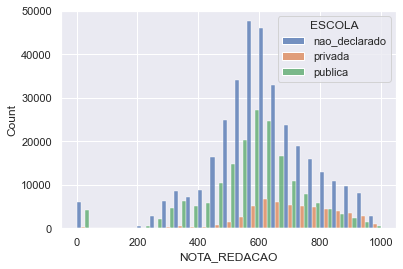

In [43]:
sns.histplot(data=df, x="NOTA_REDACAO", hue="ESCOLA", multiple="dodge", bins=25)

BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias.

<AxesSubplot:xlabel='ESCOLA', ylabel='NOTA_REDACAO'>

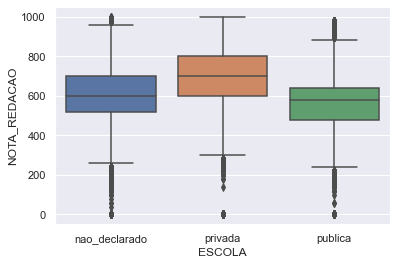

In [44]:
sns.boxplot(data=df, x="ESCOLA", y="")

### Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

Fazemos uma contagem dos assuntos mais comuns (usando groupby) e criamos uma lista contendo os assuntos com mais de 60 reclamações. Utilizaremos a lista para uso posterior.

In [77]:
df_grouped_top = df.groupby(['ESCOLA']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 60]
list_grouped = list(df_grouped_top['ESCOLA'])
list_grouped

['nao_declarado', 'privada', 'publica']

Criando um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

In [76]:
df_esc = df[df['ESCOLA'].isin(list_grouped)]
df_esc

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-Guaçu,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581166,"1,90E+11",São Paulo,18,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,479.1,espanhol,sem_problemas,100.0,120.0,120.0,140.0,100.0,580.0,B
581167,"1,90E+11",São Paulo,17,F,solteiro(a),preta,brasileiro(a),conclui_2019,publica,nao,...,43.2,espanhol,sem_problemas,80.0,120.0,140.0,120.0,100.0,560.0,B
581168,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,487.3,ingles,sem_problemas,120.0,80.0,60.0,120.0,0.0,380.0,B
581169,"1,90E+11",São Paulo,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,401.1,ingles,sem_problemas,160.0,120.0,160.0,140.0,160.0,740.0,A


### Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Com o método crosstab() podemos gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas.

In [98]:
df_cross = pd.crosstab(df_esc.NOTA_REDACAO, df_esc.ESCOLA)
df_cross.head(20)

ESCOLA,nao_declarado,privada,publica
NOTA_REDACAO,,,
0.0,6000,198,4239
40.0,1,0,0
60.0,2,0,2
80.0,1,0,0
100.0,4,0,1
120.0,11,0,6
140.0,12,1,8
160.0,44,0,23
180.0,64,2,45


Usando o DataFrame obtido anteriormente vamos gerar a matriz de correlações entre escolas

In [95]:
df_corr = df_cross.corr()
df_corr

ESCOLA,nao_declarado,privada,publica
ESCOLA,,,
nao_declarado,1.000000,0.771494,0.977330
privada,0.771494,1.000000,0.624661
publica,0.977330,0.624661,1.000000


In [96]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

ESCOLA,nao_declarado,privada,publica
ESCOLA,,,
nao_declarado,1.000000,0.771494,0.977330
privada,0.771494,1.000000,0.624661
publica,0.977330,0.624661,1.000000


In [100]:
df_reclamacao_bairro = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_reclamacao_bairro

,COUNT
ESCOLA,
nao_declarado,345914
privada,55923
publica,179334


<AxesSubplot:xlabel='COUNT', ylabel='ESCOLA'>

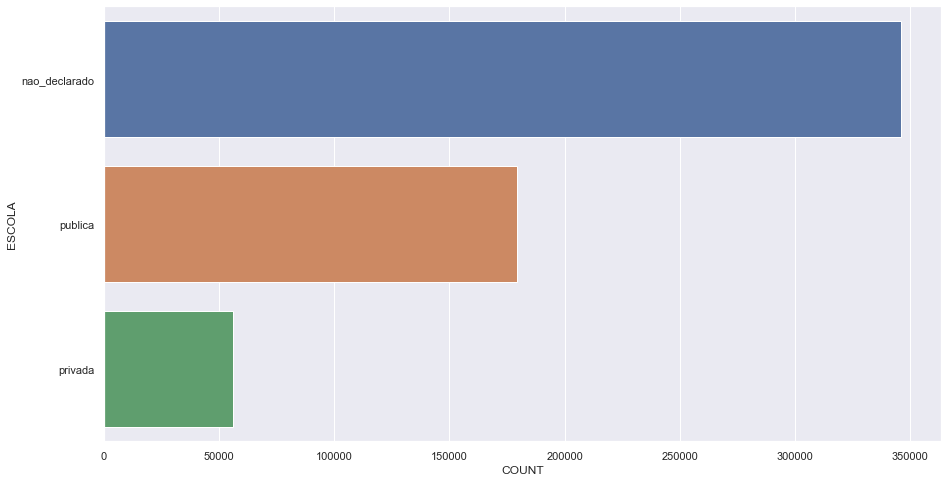

In [101]:
dfgraph = df.groupby(['ESCOLA']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="ESCOLA", orient="h")